In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("/Users/abhinandanmahata/Desktop/ML/Assignments/Hackathon/file/train.csv")
test=pd.read_csv("/Users/abhinandanmahata/Desktop/ML/Assignments/Hackathon/file/test.csv")

In [3]:
train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [4]:
train.shape

(50553, 12)

In [5]:
train.dtypes

ID                        int64
Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                     int64
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [6]:
train.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [7]:
train.describe()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,31679.740134,0.014658,49.425969,40.800977,9.83809,40.011236
std,18288.265350,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,15891.000000,0.000000,9.000000,18.000000,0.00000,35.000000
50%,31657.000000,0.000000,22.000000,26.500000,0.00000,36.000000
75%,47547.000000,0.000000,53.000000,48.000000,11.55000,44.000000
max,63325.000000,1.000000,4881.000000,810.000000,283.50000,118.000000


In [8]:
train["Product Name"].unique()

array(['Rental Vehicle Excess Insurance', 'Cancellation Plan',
       '2 way Comprehensive Plan', 'Value Plan', 'Basic Plan',
       'Bronze Plan', 'Ticket Protector', '1 way Comprehensive Plan',
       'Comprehensive Plan', 'Silver Plan', 'Premier Plan',
       'Annual Silver Plan', 'Annual Gold Plan',
       'Single Trip Travel Protect Silver', 'Travel Cruise Protect',
       '24 Protect', 'Annual Travel Protect Gold',
       'Single Trip Travel Protect Platinum',
       'Single Trip Travel Protect Gold',
       'Spouse or Parents Comprehensive Plan', 'Gold Plan',
       'Annual Travel Protect Silver', 'Individual Comprehensive Plan',
       'Annual Travel Protect Platinum', 'Child Comprehensive Plan'],
      dtype=object)

In [9]:
# generate count statistics of duplicate entries
if len(train[train.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(train[train.duplicated()]))
    print(train[train.duplicated(keep=False)].sort_values(by=list(train.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [10]:
# generate preview of entries with null values
if len(train[train.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(train[train.isnull().any(axis=1)].head(3))
    missingno.matrix(train)
    plt.show()


Preview of data with null values:
xxxxxxxxxxxxx
      ID Agency    Agency Type Distribution Channel  \
0   3433    CWT  Travel Agency               Online   
1   4339    EPX  Travel Agency               Online   
2  34590    CWT  Travel Agency               Online   

                      Product Name  Claim  Duration Destination  Net Sales  \
0  Rental Vehicle Excess Insurance      0         7    MALAYSIA        0.0   
1                Cancellation Plan      0        85   SINGAPORE       69.0   
2  Rental Vehicle Excess Insurance      0        11    MALAYSIA       19.8   

   Commision (in value) Gender  Age  
0                 17.82    NaN   31  
1                  0.00    NaN   36  
2                 11.88    NaN   75  


NameError: name 'missingno' is not defined

In [11]:
train["Gender"]=train["Gender"].fillna("U")

In [12]:
train.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

In [13]:
numerical = train.select_dtypes(exclude=['object','category'])
categorical = train.select_dtypes(include=['object','category'])

In [16]:
def univariate(categorical,column,rows,cols):
    fig,axes = plt.subplots(rows,cols,figsize=(15,15))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)
    for i in range(rows):
        for j in range(cols):
            col=column[ i * 2 + j]
            categorical[col].value_counts().plot(kind='bar',ax=axes[i,j])
            axes[i,j].title.set_text(col)

In [15]:
pip install xgboost

  Using cached https://files.pythonhosted.org/packages/96/84/4e2cae6247f397f83d8adc5c2a2a0c5d7d790a14a4c7400ff6574586f589/xgboost-0.90.tar.gz
    ERROR: Complete output from command python setup.py egg_info:
    ERROR: ++ pwd
    + oldpath=/private/var/folders/jg/vp7cy0d91m5bxqcnml9mqqfc0000gn/T/pip-install-cua_u4lx/xgboost
    + cd ./xgboost/
    + echo darwin18
    + grep -q darwin
    + LIB_XGBOOST=libxgboost.dylib
    + which g++-5
    + which g++-7
    + which g++-8
    + which clang++
    /usr/bin/clang++
    + export CC=clang
    + CC=clang
    + export CXX=clang++
    + CXX=clang++
    + make clean
    xcode-select: note: no developer tools were found at '/Applications/Xcode.app', requesting install. Choose an option in the dialog to download the command line developer tools.
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/private/var/folders/jg/vp7cy0d91m5bxqcnml9mqqfc0000gn/T/pip-install-cua_u4lx/xgboost/setup.py", line 42, in <m

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

ModuleNotFoundError: No module named 'xgboost'

In [18]:
dataframe=train

In [103]:
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()

numeric_columns = numeric_features(dataframe)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)



# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(dataframe)
print("Categorical Features:")
print(categorical_columns)


# Function to check the datatypes of all the columns:
def check_datatypes(dataset):
    
    return dataset.dtypes


check_datatypes(dataframe)

Numeric Features:
      ID  Claim  Duration  Net Sales  Commision (in value)  Age
0   3433      0         7        0.0                 17.82   31
1   4339      0        85       69.0                  0.00   36
2  34590      0        11       19.8                 11.88   75
3  55816      0        16       20.0                  0.00   32
4  13816      0        10       15.0                  0.00   29
Categorical Features:
  Agency    Agency Type Distribution Channel                     Product Name  \
0    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
1    EPX  Travel Agency               Online                Cancellation Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    EPX  Travel Agency               Online         2 way Comprehensive Plan   
4    EPX  Travel Agency               Online                Cancellation Plan   

          Destination Gender  
0            MALAYSIA      U  
1           SINGAPORE      

ID                        int64
Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                     int64
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [104]:
# Function to identify the number of missing values in every feature
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(dataframe)
print(missing_data)

                      Total  Percent
Age                       0      0.0
Gender                    0      0.0
Commision (in value)      0      0.0
Net Sales                 0      0.0
Destination               0      0.0
Duration                  0      0.0
Claim                     0      0.0
Product Name              0      0.0
Distribution Channel      0      0.0
Agency Type               0      0.0
Agency                    0      0.0
ID                        0      0.0


In [107]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(dataframe)

,Feature,Number of Outliers
0,ID,0
1,Claim,741
2,Duration,4465
3,Net Sales,4444
4,Commision (in value),5629
5,Age,4702


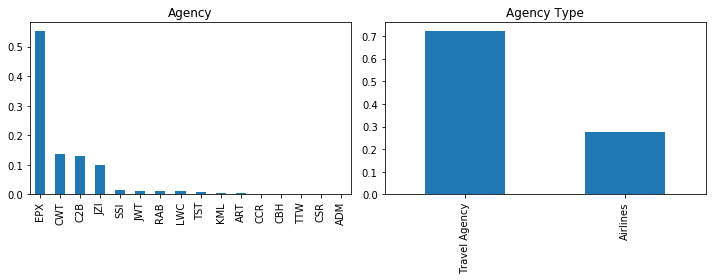

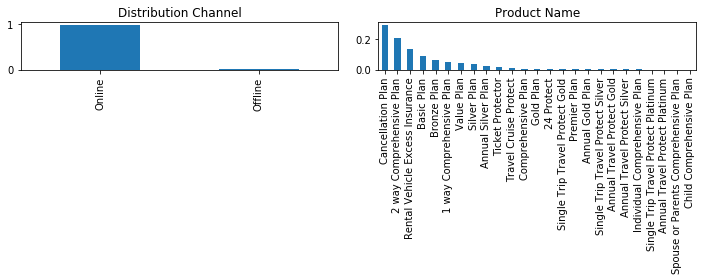

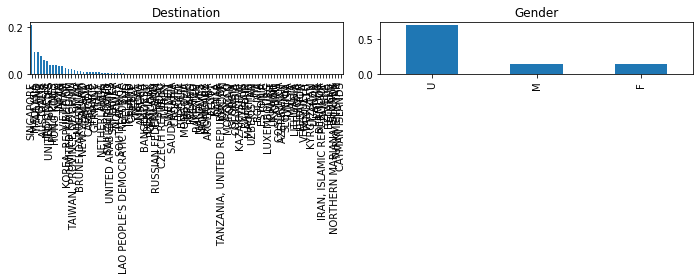

In [108]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
        
        
        
        
plot = plot_categorical_columns(dataframe)

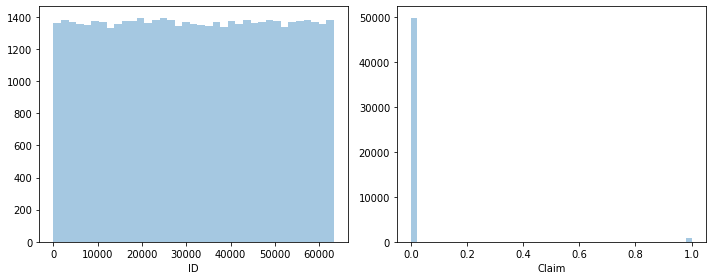

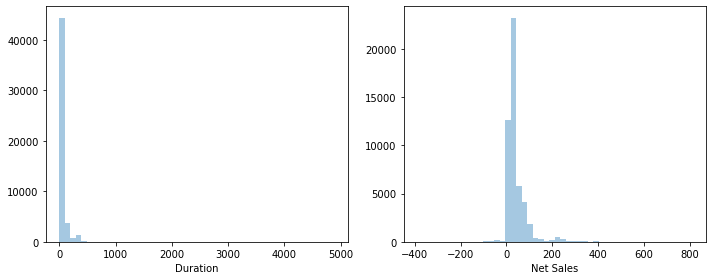

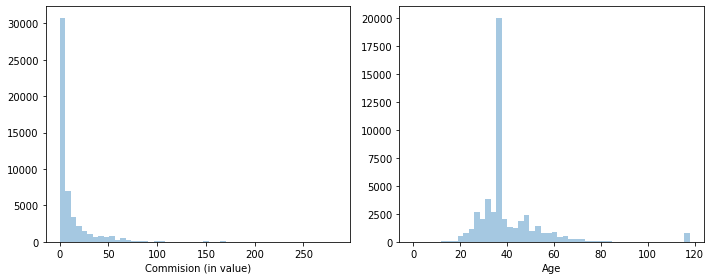

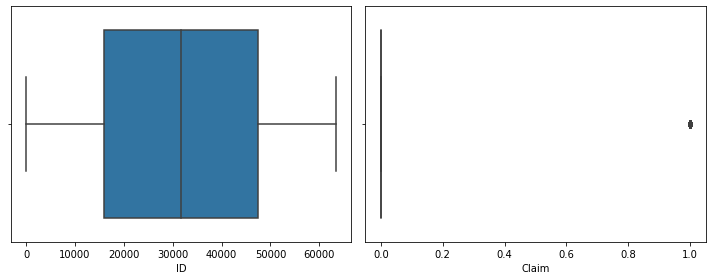

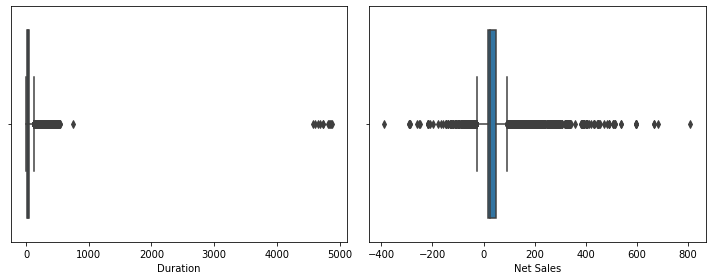

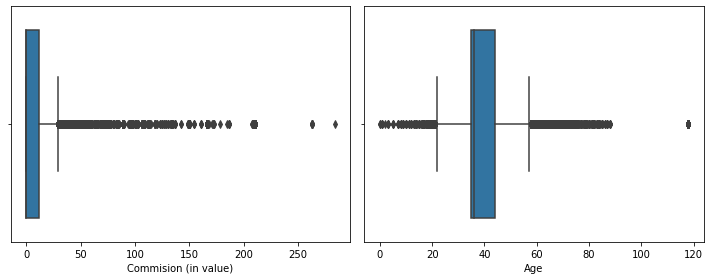

In [109]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_continuous_columns(dataframe)            
plot_box_plots(dataframe)

Bi Variate Analysis

In [110]:
def bivariate_analysis_categorical(dataframe,target):
    categorical_columns = dataframe.select_dtypes(exclude=np.number).columns
    for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=dataframe[categorical_columns[i]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(dataframe[categorical_columns[i+1]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


bivariate_analysis_categorical(dataframe,dataframe['y'])

KeyError: 'y'

In [111]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


dataframe = treat_outliers(dataframe)

# Checking for outliers after applying winsorization
detect_outliers(dataframe)

,Feature,Number of Outliers
0,ID,0
1,Claim,0
2,Duration,0
3,Net Sales,0
4,Commision (in value),5629
5,Age,0


In [112]:
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset
dataframe = dummyEncode(dataframe)

In [ ]:
from sklearn.model_selection import train_test_split

def run_model(predictors,target, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.2,random_state=42)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)
    print('Classification Report:')
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return auc

# Predictors
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,'Gradient Boosting':GradientBoostingClassifier}

for i in models.items():
    # run model
    model = i[1]()
    auc = run_model(X, y, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(i[0]))
    print('===='*20)